<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/augmented_reality/101/opencv_detect_aruco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-detect-aruco/opencv-detect-aruco.zip
!unzip -qq opencv-detect-aruco.zip
%cd opencv-detect-aruco

--2022-06-03 09:57:53--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-detect-aruco/opencv-detect-aruco.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.241.241
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.241.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 406617 (397K) [application/zip]
Saving to: ‘opencv-detect-aruco.zip’

opencv-detect-aruco 100%[===================>] 397.09K  1.20MB/s    in 0.3s    

2022-06-03 09:57:54 (1.20 MB/s) - ‘opencv-detect-aruco.zip’ saved [406617/406617]

/content/opencv-detect-aruco


In [2]:
# import packages
import argparse
import sys
import time

import cv2
import imutils
import matplotlib.pyplot as plt
from imutils.video import VideoStream

In [3]:
def plt_imshow(title, image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(title)
  plt.grid(False)
  plt.show()

In [4]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image containing ArUCo tag")
# ap.add_argument("-t", "--type", type=str,
# 	default="DICT_ARUCO_ORIGINAL",
# 	help="type of ArUCo tag to detect")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "images/example_01.png",
    "type": "DICT_5X5_100",
}

In [5]:
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

### Detecting ArUCo markers with OpenCV in images

In [6]:
# load input image from disk and resize it
print("[INFO] loading image...")
image = cv2.imread(args["image"])
image = imutils.resize(image, width=600)

# verify that supplied ArUCo tag exists and is supported by OpenCV
if ARUCO_DICT.get(args["type"], None) is None:
  print(f"[INFO] ArUCo tag of type {args['type']} is not supported")
  sys.exit(0)

# load the ArUCo dict
print(f"[INFO] detecting {args['type']} tags...")
aruco_dict = cv2.aruco.Dictionary_get(ARUCO_DICT[args["type"]]
                                      )
# grab the parameters
aruco_params = cv2.aruco.DetectorParameters_create()

# detect markers
(corners, ids, rejected) = cv2.aruco.detectMarkers(
    image, 
    aruco_dict, 
    parameters=aruco_params
    )

[INFO] loading image...
[INFO] detecting DICT_5X5_100 tags...


[INFO] ArUCo marker ID: 42


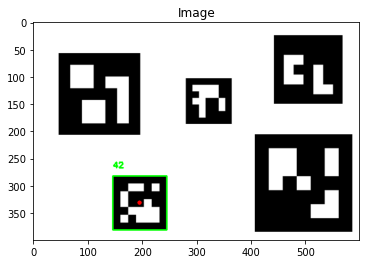

[INFO] ArUCo marker ID: 24


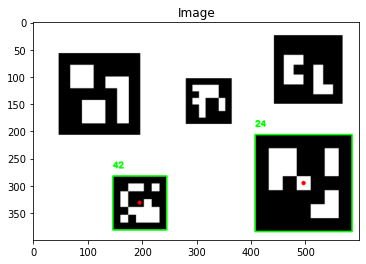

[INFO] ArUCo marker ID: 70


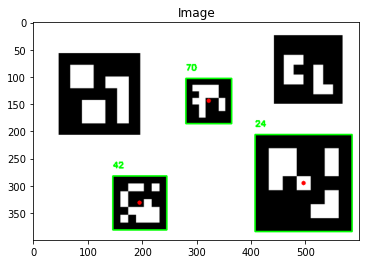

[INFO] ArUCo marker ID: 66


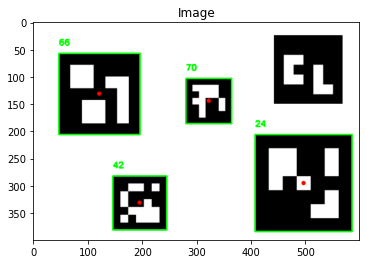

[INFO] ArUCo marker ID: 87


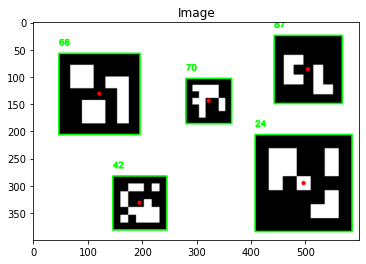

In [7]:
# verify that at least one ArUCo marker was detected
if len(corners) > 0:
    # flatten ArUCo IDs list
    ids = ids.flatten()

    # loop over detected corners
    for (marker_corner, marker_id) in zip(corners, ids):
        # extract marker corners (ordered tl, tr, br, bl)
        corners = marker_corner.reshape((4, 2))
        (tl, tr, br, bl) = corners

        # convert each (x,y) pair to ints
        tr = (int(tr[0]), int(tr[1]))
        br = (int(br[0]), int(br[1]))
        tl = (int(tl[0]), int(tl[1]))
        bl = (int(bl[0]), int(bl[1]))

        # draw bounding box of ArUCo detection
        cv2.line(image, tl, tr, (0, 255, 0), 2)
        cv2.line(image, tr, br, (0, 255, 0), 2)
        cv2.line(image, br, bl, (0, 255, 0), 2)
        cv2.line(image, bl, tl, (0, 255, 0), 2)

        # compute and draw center coords of marker
        cx = int((tl[0] + br[0]) / 2.0)
        cy = int((tl[1] + br[1]) / 2.0)
        cv2.circle(image, (cx, cy), 4, (0, 0, 255), -1)

        # draw ArUCo marker ID on the image
        cv2.putText(
            image, 
            str(marker_id), 
            (tl[0], tl[1] - 15), 
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5, 
            (0, 255, 0),
            2,
            )
        print(f"[INFO] ArUCo marker ID: {marker_id}")

    # show output image
    plt_imshow("Image", image)

### Detecting ArUCo markers with OpenCV in real-time video streams

In [8]:
# first, let's download a sample video we will use to detect ArUco markers
!wget https://colab-notebook-videos.s3-us-west-2.amazonaws.com/aruco_sample.mp4

--2022-06-03 10:23:18--  https://colab-notebook-videos.s3-us-west-2.amazonaws.com/aruco_sample.mp4
Resolving colab-notebook-videos.s3-us-west-2.amazonaws.com (colab-notebook-videos.s3-us-west-2.amazonaws.com)... 52.218.160.65
Connecting to colab-notebook-videos.s3-us-west-2.amazonaws.com (colab-notebook-videos.s3-us-west-2.amazonaws.com)|52.218.160.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10835110 (10M) [video/mp4]
Saving to: ‘aruco_sample.mp4’

aruco_sample.mp4    100%[===================>]  10.33M  12.3MB/s    in 0.8s    

2022-06-03 10:23:19 (12.3 MB/s) - ‘aruco_sample.mp4’ saved [10835110/10835110]



In [9]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-t", "--type", type=str,
# 	default="DICT_ARUCO_ORIGINAL",
# 	help="type of ArUCo tag to detect")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "type": "DICT_ARUCO_ORIGINAL",
    "video": "aruco_sample.mp4",
    "output": "output.avi"
}

In [10]:
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [11]:
# verify that supplied ArUCo tag exists and is supported by OpenCV
if ARUCO_DICT.get(args["type"], None) is None:
    print(f"[INFO] ArUCo tag of type {args['type']} is not supported")
    sys.exit(0)

# load the ArUCo dict
print(f"[INFO] detecting {args['type']} tags...")
aruco_dict = cv2.aruco.Dictionary_get(ARUCO_DICT[args["type"]]
                                      )
# grab the parameters
aruco_params = cv2.aruco.DetectorParameters_create()

# init video stream and 
vs = cv2.VideoCapture(args["video"])

# init pointer to output video file
writer = None

# init frame dimensions
(W, H) = (None, None)

# try to determine the total number of frames in the video file
try:
    prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() \
        else cv2.CAP_PROP_FRAME_COUNT
    total = int(vs.get(prop))
    print(f"[INFO] {total} total frames in video")
# error occurred
except:
    print("[INFO] could not determine # of frames in video, approx completion time unavailable")
    total = -1


[INFO] detecting DICT_ARUCO_ORIGINAL tags...
[INFO] 427 total frames in video


In [12]:
# loop over frames
while True:
    # read next frame
    (grabbed, frame) = vs.read()

    # end of stream/video?
    if not grabbed:
        break

    # resize frame 
    frame = imutils.resize(frame, width=600)

    # detect ArUCo markers in input frame
    (corners, ids, rejected) = cv2.aruco.detectMarkers(
        frame, 
        aruco_dict,
        parameters=aruco_params
        )
    
    # verify at least one marker was detected
    if len(corners) > 0:
        # flatten IDs list
        ids = ids.flatten()

        # loop over detected corners
        for (marker_corner, marker_id) in zip(corners, ids):
            # extract marker corners (ordered tl, tr, br, bl)
            corners = marker_corner.reshape((4, 2))
            (tl, tr, br, bl) = corners

            # convert each (x,y) pair to ints
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            tl = (int(tl[0]), int(tl[1]))
            bl = (int(bl[0]), int(bl[1]))

            # draw bounding box of ArUCo detection
            cv2.line(frame, tl, tr, (0, 255, 0), 2)
            cv2.line(frame, tr, br, (0, 255, 0), 2)
            cv2.line(frame, br, bl, (0, 255, 0), 2)
            cv2.line(frame, bl, tl, (0, 255, 0), 2)

            # compute and draw center coords of marker
            cx = int((tl[0] + br[0]) / 2.0)
            cy = int((tl[1] + br[1]) / 2.0)
            cv2.circle(frame, (cx, cy), 4, (0, 0, 255), -1)

            # draw ArUCo marker ID on the image
            cv2.putText(
                frame, 
                str(marker_id), 
                (tl[0], tl[1] - 15), 
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5, 
                (0, 255, 0),
                2,
                )
        
    # check if writer is None
    if writer is None:
        # init video writer
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
        writer = cv2.VideoWriter(
            args["output"], 
            fourcc, 
            30, 
            (frame.shape[1], frame.shape[0]), 
            True
            )
    # write output frame to disk
    writer.write(frame)

# release file pointers
print("[INFO] cleaning up...")
writer.release()
vs.release()


  
  

[INFO] cleaning up...


In [13]:
# convert from AVI to MP4
!ffmpeg -i "output.avi" output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [14]:
#@title Display video inline
from IPython.display import HTML
from base64 import b64encode

mp4 = open("output.mp4", "rb").read()
dataURL = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=700 controls>
      <source src="%s" type="video/mp4">
</video>
""" % dataURL)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Detecting ArUco markers with OpenCV and Python*](https://www.pyimagesearch.com/2020/12/21/detecting-aruco-markers-with-opencv-and-python/) blog post published on 12-21-2020.